In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

## Statistic - 1 name

In [76]:
dataframe = pd.read_csv('source/nat1900-2017.tsv', sep='\t')
dataframe.rename(columns={"sexe":"Gender", "preusuel":"Name","annais":"Years","nombre":"Number of newborns"}, inplace=True)
dataframe.set_index('Years', inplace=True)
dataframe.drop('XXXX', inplace=True)
dataframe.Gender = dataframe.Gender.map({1:'male', 2:'female'})
dataframe.index = pd.to_numeric(dataframe.index,errors='coerce')


In [77]:
my_filter = lambda name: dataframe.Name == name
results = dataframe[my_filter('MILENA')]
results

,Gender,Name,Number of newborns
Years,,,
1923,female,MILENA,3
1927,female,MILENA,3
1931,female,MILENA,5
1932,female,MILENA,4
1942,female,MILENA,3
...,...,...,...
2013,female,MILENA,65
2014,female,MILENA,65
2015,female,MILENA,77


In [56]:
filter_years = (results.index >= 1930) & (results.index <= 1960)
results = results[filter_years]
results

,Gender,Name,Number of newborns
Years,,,
1931,female,MILENA,5
1932,female,MILENA,4
1942,female,MILENA,3
1948,female,MILENA,3
1949,female,MILENA,4
1951,female,MILENA,4
1954,female,MILENA,6
1955,female,MILENA,4
1956,female,MILENA,3


In [57]:
results_years = results.loc[:, ['Number of newborns']]
results_years

,Number of newborns
Years,
1931,5
1932,4
1942,3
1948,3
1949,4
1951,4
1954,6
1955,4
1956,3


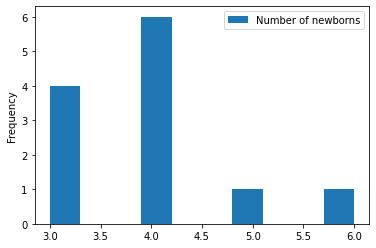

In [62]:
results_years.plot.hist()

In [63]:
results = results.groupby(pd.cut(results.index, np.arange(1930,1970, 10))).sum()

indexes = [''.join((str(x), '-', str(x+10))) for x in range(1930,1960, 10)]
results.index = indexes
results

,Number of newborns
1930-1940,9
1940-1950,10
1950-1960,28


In [71]:
records = dict(results['Number of newborns'])
records

{'1930-1940': 9, '1940-1950': 10, '1950-1960': 28}

In [72]:
records.values()

dict_values([9, 10, 28])

In [73]:
records.keys()

dict_keys(['1930-1940', '1940-1950', '1950-1960'])

<BarContainer object of 3 artists>

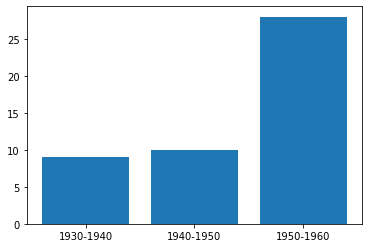

In [74]:
x_labels = records.keys()
y_labels = records.values()

plt.bar(x_labels, y_labels)

## Compare names

In [78]:
dataframe = pd.read_csv('source/nat1900-2017.tsv', sep='\t')
dataframe.rename(columns={"sexe":"Gender", "preusuel":"Name","annais":"Years","nombre":"Number of newborns"}, inplace=True)
dataframe.set_index('Years', inplace=True)
dataframe.drop('XXXX', inplace=True)
dataframe.Gender = dataframe.Gender.map({1:'male', 2:'female'})
dataframe.index = pd.to_numeric(dataframe.index,errors='coerce')